# Simulated Annealing Algorithm 

<left><img src="https://www.researchgate.net/profile/Ali_Asghar_Rahmani_Hosseinabadi/publication/309537833/figure/fig2/AS:427530462208002@1478942613337/The-pseudo-code-of-simulated-annealing-algorithm.png" />



# Core Functions

In [2]:
import sys
import time
import math
import random
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation

# generate init city sequence
def initCitySequence(cities_number):
    sequence = []
    while len(sequence) < cities_number:
        random_number = random.randint(1, cities_number)
        if random_number not in sequence:
            sequence.append(random_number)
    return sequence


def createRandomCombination(origin_sequence, swap_number):
    combination_list = []
    swap_list = getRandomSquence(swap_number, len(origin_sequence))
    permutations = list(itertools.permutations(swap_list, len(swap_list)))
    for seq in permutations:
        temp_seq = origin_sequence.copy()
        for index, element in enumerate(swap_list):
            temp_seq[element] = origin_sequence[seq[index]]
        combination_list.append(temp_seq)
    return combination_list
    

# generate a ${squence_number} numbers squence that in range of ${squence_range}
def getRandomSquence(squence_number, squence_range):
    result_squence = []
    while len(result_squence) < squence_number:
        random_number = random.randint(0, squence_range-1)
        if random_number not in result_squence:
            result_squence.append(random_number)
    result_squence.sort()
    return result_squence


# return the minimum sequnce and distance with Simulated Annealing Algorithm
def determine(combination_list, dic, tamperature):
    minimum_sequence =  combination_list[0]
    minimum_distance = evalu(combination_list[0], dic)
    
    temp_min_sequence = combination_list[1]
    temp_min_distance = evalu(combination_list[1], dic)
    for city_sequence in combination_list[2:]:
        temp_distance = evalu(city_sequence, dic)
        if temp_distance < temp_min_distance:
            temp_min_sequence = city_sequence
            temp_min_distance = temp_distance
    
    value = temp_min_distance - minimum_distance
    # 如果有找到更好的解，就回傳
    if value < 0:
        minimum_sequence = temp_min_sequence
        minimum_distance = temp_min_distance
    # 如果沒找到更好的，就根據波茲曼函數產生出的機率，決定要不要用次佳解
    else:
        r = random.random()
        if math.exp((-1)*value/tamperature) >= r:
            minimum_sequence = temp_min_sequence
            minimum_distance = temp_min_distance
        
    return minimum_sequence, minimum_distance

def evalu(seq, dic):
    dist = 0
    seq_length = len(seq)
    for i in range(seq_length):
        d = [dic[seq[i]][0]-dic[seq[(i+1)%seq_length]][0], dic[seq[i]][1]-dic[seq[(i+1)%seq_length]][1]]
        dist += distance(d)
    return dist

def distance(axis):
    return math.sqrt(axis[0]*axis[0]+axis[1]*axis[1])

def getPath(cities_seq, dic):
    x = []
    y = []
    for city in cities_seq:
        x.append(dic[city][0])
        y.append(dic[city][1])
    return x, y
    

# read the 51 cities file
def readfile():
    dic = {}
    with open('eil51.txt') as f:
        r = f.read()
        read_line = r.split('\n')               
        for i in range(len(read_line)):         
            read_element = read_line[i].split()
            dic[int(read_element[0])] = [int(read_element[1])]
            dic[int(read_element[0])].append(int(read_element[2]))
        f.close()
    return dic

# Main Function

Please enter the iteration number: 10000


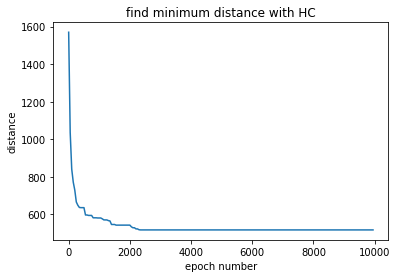

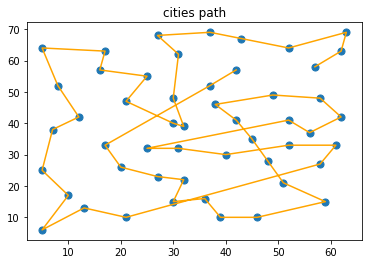


Final sequence: [20, 35, 36, 3, 28, 31, 26, 8, 27, 46, 51, 6, 48, 23, 7, 43, 24, 14, 25, 13, 41, 40, 19, 42, 30, 34, 9, 5, 12, 47, 16, 50, 21, 29, 2, 32, 11, 38, 49, 10, 39, 33, 45, 15, 44, 37, 17, 4, 18, 1, 22]
Final distance: 517.8522992200278


In [3]:
#initial   
cities_number = 51
local_min_sequence = initCitySequence(cities_number)
local_min_distance = 0

dic = readfile()

iter_num = input('Please enter the iteration number:')
iter_num = int(iter_num)

swap_citices_number = 2
iteration_per_frames = 50

epcho_list = []
sequence_list = []
distance_list = []
tamperature = 1000.0

for i in range(iter_num):
    different_combination_list = createRandomCombination(local_min_sequence, 4)
    local_min_sequence, local_min_distance= determine(different_combination_list, dic, tamperature)
    tamperature = tamperature * 0.95
    if i % iteration_per_frames == 0:
        epcho_list.append(i)
        sequence_list.append(local_min_sequence)
        distance_list.append(local_min_distance)

#Output
plt.xlabel('epoch number')
plt.ylabel('distance')
plt.title('find minimum distance with HC')
plt.plot(epcho_list, distance_list)


plt.figure()
plt.title('cities path')
x, y = getPath(local_min_sequence, dic) 
plt.scatter(x, y, s=50)
plt.plot(x, y, 'orange')
plt.show()

print('\nFinal sequence:',local_min_sequence)
print('Final distance:',local_min_distance)

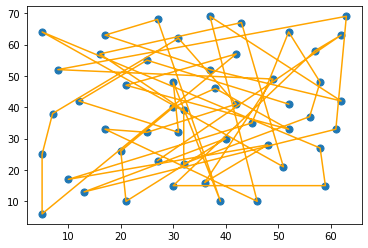

In [4]:
# animation
fig, ax = plt.subplots()
plt.scatter(x, y, s=50)
line, =ax.plot(x, y, 'orange')

def animate(i):
    x, y = getPath(sequence_list[i], dic) 
    line.set_data(x, y)
    return line,
    
ani = matplotlib.animation.FuncAnimation(fig, func=animate, interval=200, frames=len(epcho_list),blit=False, repeat=False)

from IPython.display import HTML
HTML(ani.to_jshtml())